In [1]:
import sys
sys.path.append("..")
from dataset.training_dataset import SpeechDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from settings import ALL_CLASSES, NUM_CLASSES

In [2]:
dataset = SpeechDataset("../artifacts/speech-waveform:v0", 16, None)
dataset.setup()

[Text(0, 0, '1,860'),
 Text(0, 0, '1,607'),
 Text(0, 0, '1,843'),
 Text(0, 0, '1,842'),
 Text(0, 0, '1,839'),
 Text(0, 0, '1,852'),
 Text(0, 0, '1,864'),
 Text(0, 0, '1,839'),
 Text(0, 0, '1,885'),
 Text(0, 0, '1,861'),
 Text(0, 0, '359'),
 Text(0, 0, '31,627')]

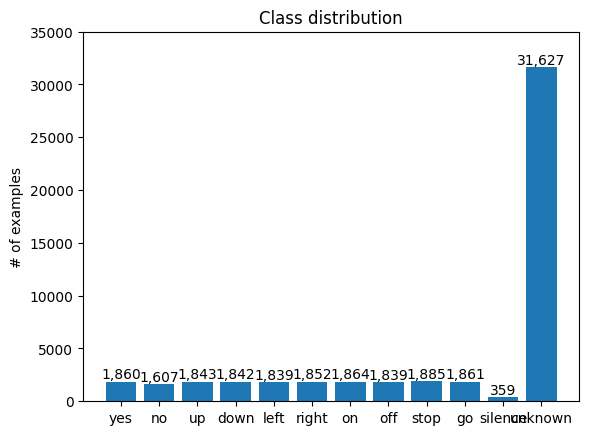

In [3]:
dl = DataLoader(dataset.train, batch_size=16, num_workers=4, shuffle=True)
counts = np.zeros(NUM_CLASSES)

for _, ys in dl:
    for y in ys:
        counts[y] += 1
        

fig, ax = plt.subplots()
bar_container = ax.bar(ALL_CLASSES, counts)
ax.set(ylabel='# of examples', title='Class distribution', ylim=(0, 35000))
ax.bar_label(bar_container, fmt='{:,.0f}')

In [9]:
weights = 1/counts
weights

array([5.37634409e-04, 6.22277536e-04, 5.42593597e-04, 5.42888165e-04,
       5.43773790e-04, 5.39956803e-04, 5.36480687e-04, 5.43773790e-04,
       5.30503979e-04, 5.37345513e-04, 2.78551532e-03, 3.16185538e-05])

In [16]:
weights[dataset.train.tensors[1]]

array([0.00053996, 0.00053996, 0.00053996, ..., 0.00054377, 0.00054377,
       0.00054377])

[Text(0, 0, '1,055'),
 Text(0, 0, '993'),
 Text(0, 0, '960'),
 Text(0, 0, '987'),
 Text(0, 0, '1,010'),
 Text(0, 0, '992'),
 Text(0, 0, '991'),
 Text(0, 0, '1,001'),
 Text(0, 0, '949'),
 Text(0, 0, '1,039'),
 Text(0, 0, '1,036'),
 Text(0, 0, '987')]

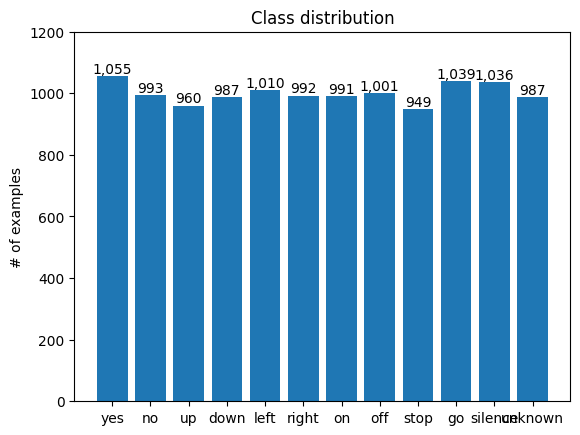

In [20]:
from torch.utils.data.sampler import WeightedRandomSampler


sampler = WeightedRandomSampler(weights[dataset.train.tensors[1]], int(1000*NUM_CLASSES), replacement=True)
dl = DataLoader(dataset.train, batch_size=16, num_workers=4, sampler=sampler)
counts2 = np.zeros(NUM_CLASSES)

for _, ys in dl:
    for y in ys:
        counts2[y] += 1
        

fig, ax = plt.subplots()
bar_container = ax.bar(ALL_CLASSES, counts2)
ax.set(ylabel='# of examples', title='Class distribution', ylim=(0, 1200))
ax.bar_label(bar_container, fmt='{:,.0f}')

In [24]:
dataset.train.tensors[1].unique(return_counts=True)
weights = (1/dataset.train.tensors[1].unique(return_counts=True)[1])[dataset.train.tensors[1]]
weights

tensor([0.0005, 0.0005, 0.0005,  ..., 0.0005, 0.0005, 0.0005])